### Signaux 1D : le son

Dans cette partie, vous allez simplement charger des sons, les écouter, regarder leur allure de spectre et voir l’influence de la fréquence d’échantillonnage.

Un son est reproduit, sous forme électrique, par un signal continu ayant un spectre qui peut aller de « 0 Hz » à plusieurs dizaines de kilohertz.  L’oreille humaine s’arrête à environ 10 kHz, mais le son lui-même peut aller jusque beaucoup plus haut.

Dans un premier temps, vous allez charger une suite de 24 notes (les 12 notes de la gamme chromatique, le tout sur deux octaves).  Utilisez le help pour connaître la signification des paramètres.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
Fs, s = scipy.io.wavfile.read('Sans titre-2.wav')
print Fs

44100


In [3]:
#écouter le son 
import vlc
p = vlc.MediaPlayer('Sans titre-2.wav')
p.play()


In [4]:
s1 = s[:,1]
s1 = np.resize(s1,(1,1102848))
s.shape

(1102848, 2)

In [5]:
x1 = np.arange(0,1.005,0.005)
x2 = np.ones(Fs-3000-402)
x3 = np.arange(1.005,0,-0.005) 

In [6]:
a = np.concatenate((x1,x2))
win =  np.concatenate((a,x3))
win.shape

(41100,)

In [7]:
note = list()
for i in range(1,24):
    note.append(s1[0,(np.dot(Fs,i-1)+3000):(np.dot(Fs,i))]*win)

In [8]:
#Selection premier note
y = note[0]

In [9]:
#Spectre premier note
n = len(y) 
k = np.arange(n)
T = n/float(Fs)
frq = k/float(T)      
frq = frq[range(n/2)] 
Y = np.fft.fft(y, norm="ortho")
Y = Y[range(n/2)]

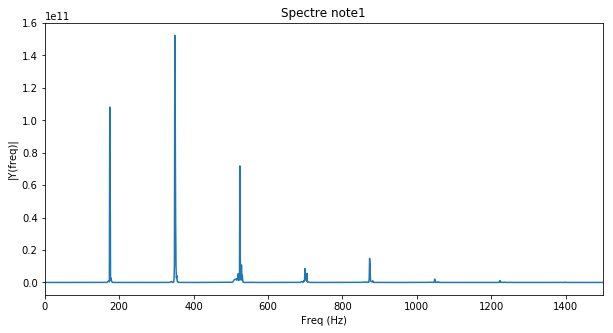

In [13]:
#Affichage spectre
import matplotlib.pyplot as plt
plt.figure(1,figsize = (10,5))
plt.plot(frq,abs(Y)**2)
plt.xlim(0, 1500 ) 
plt.title('Spectre note1')
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.show()

Essayer d'afficher les different spectres des autres notes. Que dire des harmoniques?
